In [11]:
# !pip install matplotlib pandas folium geopandas

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

In [2]:
url = "./make_file/서울시_자동차도로_전체.csv"

In [3]:
data = pd.read_csv(url, low_memory=False)

In [4]:
data.columns

Index(['도로명', '도로 종류', '시작점_위도', '시작점_경도', '종료점_위도', '종료점_경도', '중앙점_위도',
       '중앙점_경도', '도로_길이', '터널 여부', '교량 여부', '서비스 도로 여부', '도로 ID', '속도 제한',
       '차선 수', '일방통행 여부', '교차로 여부'],
      dtype='object')

In [5]:
start_lat = data['시작점_위도'].to_list()
start_lon = data['시작점_경도'].to_list()

end_lat = data['종료점_위도'].to_list()
end_lon = data['종료점_경도'].to_list() 

지도 생성 성공


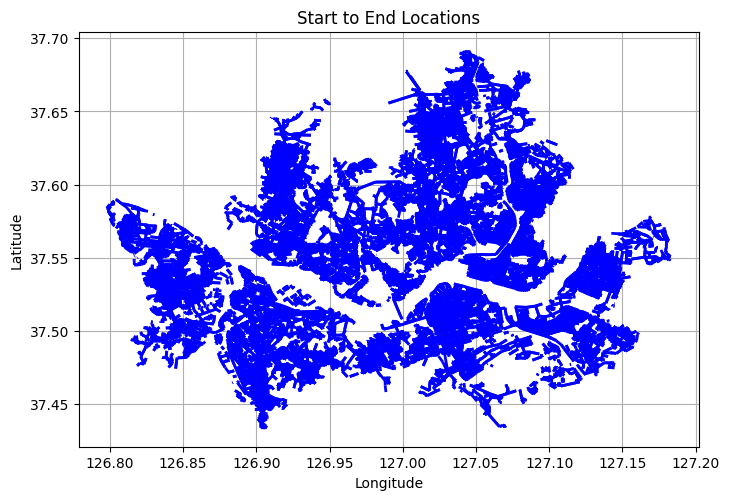

In [6]:
try : 
    # 선 데이터 생성
    lines = [LineString([(lon1, lat1), (lon2, lat2)]) for lon1, lat1, lon2, lat2 in zip(start_lon, start_lat, end_lon, end_lat)]
    
    # GeoDataFrame 생성
    gdf = gpd.GeoDataFrame(geometry=lines)
    
    # 시각화
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf.plot(ax=ax, color='blue', linewidth=2)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Start to End Locations")
    plt.grid()
    
    plt.savefig('./make_file/검증/불러온_자동차_도로_시각화.png', dpi = 1200) 

    print("지도 생성 성공")
except :
    print("err")

In [9]:
from tqdm import tqdm
import folium

try:
    # 시작 좌표의 평균을 계산하여 지도 중심 설정
    m = folium.Map(location=[sum(start_lat)/len(start_lat), sum(start_lon)/len(start_lon)], zoom_start=13)
    
    # 선 데이터 추가 (진행 상태 표시)
    for lat1, lon1, lat2, lon2 in tqdm(zip(start_lat, start_lon, end_lat, end_lon), total=len(start_lat), desc="Processing"):
        folium.PolyLine([(lat1, lon1), (lat2, lon2)], color='blue', weight=2.5, opacity=1).add_to(m)

    # HTML 파일로 저장
    m.save('./make_file/검증/불러온_자동차_도로_시각화.html')  
    print("지도 생성 성공")

except Exception as e:
    print(f"에러 발생: {e}")


Processing: 100%|███████████████████| 161645/161645 [00:01<00:00, 105513.02it/s]


지도 생성 성공
